Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders. The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between bad connections, called intrusions or attacks, and good normal connections.

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol. Each connection is labeled as either normal, or as an attack, with exactly one specific attack type. Each connection record consists of about 100 bytes.

Attacks fall into four main categories:

DOS: denial-of-service, e.g. syn flood;
R2L: unauthorized access from a remote machine, e.g. guessing password;
U2R: unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
probing: surveillance and other probing, e.g., port scanning.
It is important to note that the test data is not from the same probability distribution as the training data, and it includes specific attack types not in the training data. This makes the task more realistic. The datasets contain a total of 24 training attack types, with an additional 14 types in the test data only.

road map this is a classification problem

we have data on network attack


duration 	length (number of seconds) of the connection 	continuous
protocol_type 	type of the protocol, e.g. tcp, udp, etc. 	discrete
service 	network service on the destination, e.g., http, telnet, etc. 	discrete
src_bytes 	number of data bytes from source to destination 	continuous
dst_bytes 	number of data bytes from destination to source 	continuous
flag 	normal or error status of the connection 	discrete 
land 	1 if connection is from/to the same host/port; 0 otherwise 	discrete
wrong_fragment 	number of ``wrong'' fragments 	continuous
urgent 	number of urgent packets 	continuous
  
Table 1: Basic features of individual TCP connections.
 
feature name	description 	type
hot 	number of ``hot'' indicators	continuous
num_failed_logins 	number of failed login attempts 	continuous
logged_in 	1 if successfully logged in; 0 otherwise 	discrete
num_compromised 	number of ``compromised'' conditions 	continuous
root_shell 	1 if root shell is obtained; 0 otherwise 	discrete
su_attempted 	1 if ``su root'' command attempted; 0 otherwise 	discrete
num_root 	number of ``root'' accesses 	continuous
num_file_creations 	number of file creation operations 	continuous
num_shells 	number of shell prompts 	continuous
num_access_files 	number of operations on access control files 	continuous
num_outbound_cmds	number of outbound commands in an ftp session 	continuous
is_hot_login 	1 if the login belongs to the ``hot'' list; 0 otherwise 	discrete
is_guest_login 	1 if the login is a ``guest''login; 0 otherwise 	discrete
  
Table 2: Content features within a connection suggested by domain knowledge.
 
feature name	description 	type
count 	number of connections to the same host as the current connection in the past two seconds 	continuous
Note: The following  features refer to these same-host connections.	
serror_rate 	% of connections that have ``SYN'' errors 	continuous
rerror_rate 	% of connections that have ``REJ'' errors 	continuous
same_srv_rate 	% of connections to the same service 	continuous
diff_srv_rate 	% of connections to different services 	continuous
srv_count 	number of connections to the same service as the current connection in the past two seconds 	continuous
Note: The following features refer to these same-service connections.	
srv_serror_rate 	% of connections that have ``SYN'' errors 	continuous
srv_rerror_rate 	% of connections that have ``REJ'' errors 	continuous
srv_diff_host_rate 	% of connections to different hosts 	



lables : which we need to classify 
lets look in to the data and see the statistical anaysis
hypothesis
visualization 

build the model: svm and kernals 

In [4]:
# import packages and data

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
colnames = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [5]:
data = pd.read_csv('D:/kddcup.data_10_percent/kddcup.data_10_percent_corrected.csv',names=colnames)

In [6]:
data_test =  pd.read_csv('D:/kddcup.data_10_percent/kddcup.testdata.unlabeled_10_percent.csv',names=colnames)

In [7]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,NaN
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,NaN
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,NaN
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,NaN
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,NaN


In [9]:
data.shape

(494021, 42)

In [10]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [12]:
data['protocol_type'].value_counts().head()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [13]:
data['service'].value_counts().head()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
Name: service, dtype: int64

In [14]:
data['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [15]:
data['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [61]:
label = []
for x in data['label']:
    if x != 'normal.':
        label.append('attack')
    else:
        label.append('normal')

In [21]:
y = data.index.get_values()

In [18]:
# some visualization

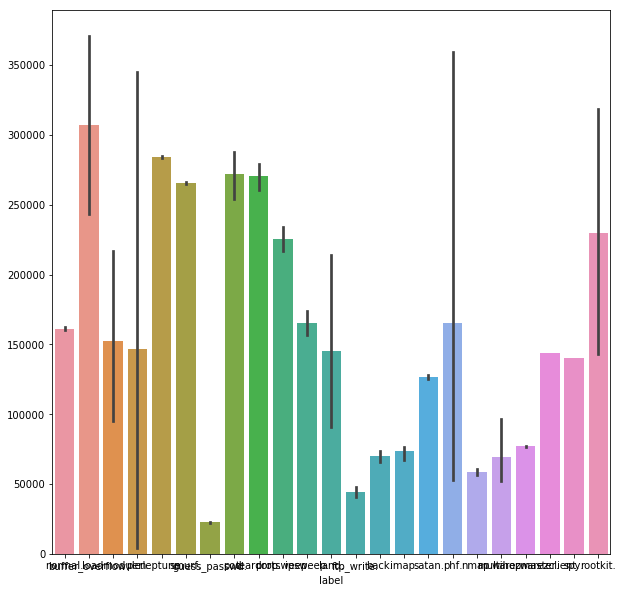

In [31]:
plt.figure(figsize=(10,10))
sns.barplot(x = data['label'], y = y)


In [32]:
len(label)

494021

In [33]:
np.unique(label)

array(['attack', 'normal'], 
      dtype='<U6')

In [76]:
data['labels'] = label

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
l = LabelEncoder()

In [37]:
l.fit(data['protocol_type'])

LabelEncoder()

In [38]:
data['protocol_type'] = l.transform(data['protocol_type'])

In [39]:
l = LabelEncoder()

In [40]:
l.fit(data['service'])

LabelEncoder()

In [41]:
data['service'] = l.transform(data['service'])


In [42]:
l = LabelEncoder()

In [43]:
l.fit(data['flag'])

LabelEncoder()

In [44]:
data['flag'] = l.transform(data['flag'])

In [45]:
#data['flag'].plot(kind ='bar')

In [78]:
l = LabelEncoder()

In [79]:
l.fit(data['labels'])

LabelEncoder()

In [80]:
data['labels'] = l.transform(data['labels'])

In [77]:
data['labels'].value_counts()

attack    396743
normal     97278
Name: labels, dtype: int64

In [72]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'labels'],
      dtype='object')

In [75]:
data.drop('label',inplace = True,axis = 1)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
L = LogisticRegression()

In [84]:
from sklearn.cross_validation import train_test_split

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8)

In [101]:
x = data.iloc[:,0:41].values

In [102]:
y = data.iloc[:,-1].values

In [105]:
L.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
pred = L.predict(x_test)

In [107]:
from sklearn.metrics import confusion_matrix

In [109]:
c = confusion_matrix(pred,y_test)

In [110]:
c 

array([[78439,   141],
       [  873, 19352]], dtype=int64)

In [118]:
c.diagonal().sum()/98805

0.98973736146956126

In [114]:
y_test.shape

(98805,)